In [108]:
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D

import numpy as np

import scipy.integrate as integrate
import scipy.special as spe

# Increase resolution for retina display
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# Load interactive widgets
import ipywidgets as widgets

## Hydrogen atom problem

In what follows we will adopt atomic units $a_0=1, \hbar=1, m_e=1, e=1$

## Plotting the radial part of wavefunction. The Laguerre polynomials

$$ R_{nl}(r) = \sqrt{\Big(\frac{2}{n a_0}\Big)^3 \frac{(n-l-1)!}{2n (n+l)!}} e^{-r/n a_0} \Big( \frac{2r}{na_0}\Big)^l  \cdot L^{2l+1}_{n-l-1} \Big(\frac{2r}{n a_0} \Big)$$

#### Step 1: Code up the function and do a basic plot

In [14]:
def psi_R(r,n=1,l=0):

    coeff = np.sqrt((2.0/n)**3 * spe.factorial(n-l-1) /(2.0*n*spe.factorial(n+l)))
    
    laguerre = spe.assoc_laguerre(2.0*r/n,n-l-1,2*l+1)
    
    return coeff * np.exp(-r/n) * (2.0*r/n)**l * laguerre

Text(0,0.5,'$R_{nl}(r)$')

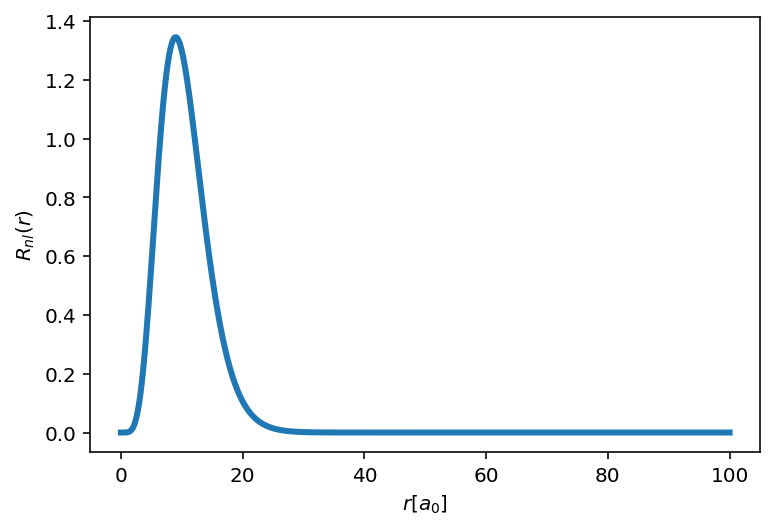

In [36]:
r = np.linspace(0,100,1000)

plt.plot(r,psi_R(r,3,2)**2 * 4*np.pi * r**2, lw=3)

plt.xlabel('$r [a_0]$')

plt.ylabel('$R_{nl}(r)$')

#### Step 2: Add an interactive widget

In [72]:

@widgets.interact(n = np.arange(1,10,1),l = np.arange(0,9,1))

def plot_radial(n,l):
    
    r =    np.linspace(0,250,10000)
    
    psi2 = psi_R(r,n,l)**2 * (4*np.pi*r**2)
    
    plt.plot(r,psi2, lw=2)
    

    ''' Styling the plot'''
    
    plt.xlabel('$r [a_0]$')

    plt.ylabel('$R_{nl}(r)$')
    
    rmax = n**2*(1+0.5*(1-l*(l+1)/n**2))
    
    plt.xlim([0, 2*rmax])

interactive(children=(Dropdown(description='n', options=(1, 2, 3, 4, 5, 6, 7, 8, 9), value=1), Dropdown(descri…

## Plotting angular part of wavefunction: Spherical harmonics

In [154]:
def psi_ang(phi,theta,l=0,m=0):
    
    sphHarm = spe.sph_harm(m,l,phi,theta)
    
    return sphHarm.real

In [159]:
phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2*np.pi, 100)

phi, theta = np.meshgrid(phi, theta)

Ylm = psi_ang(theta,phi,l=3,m=0)

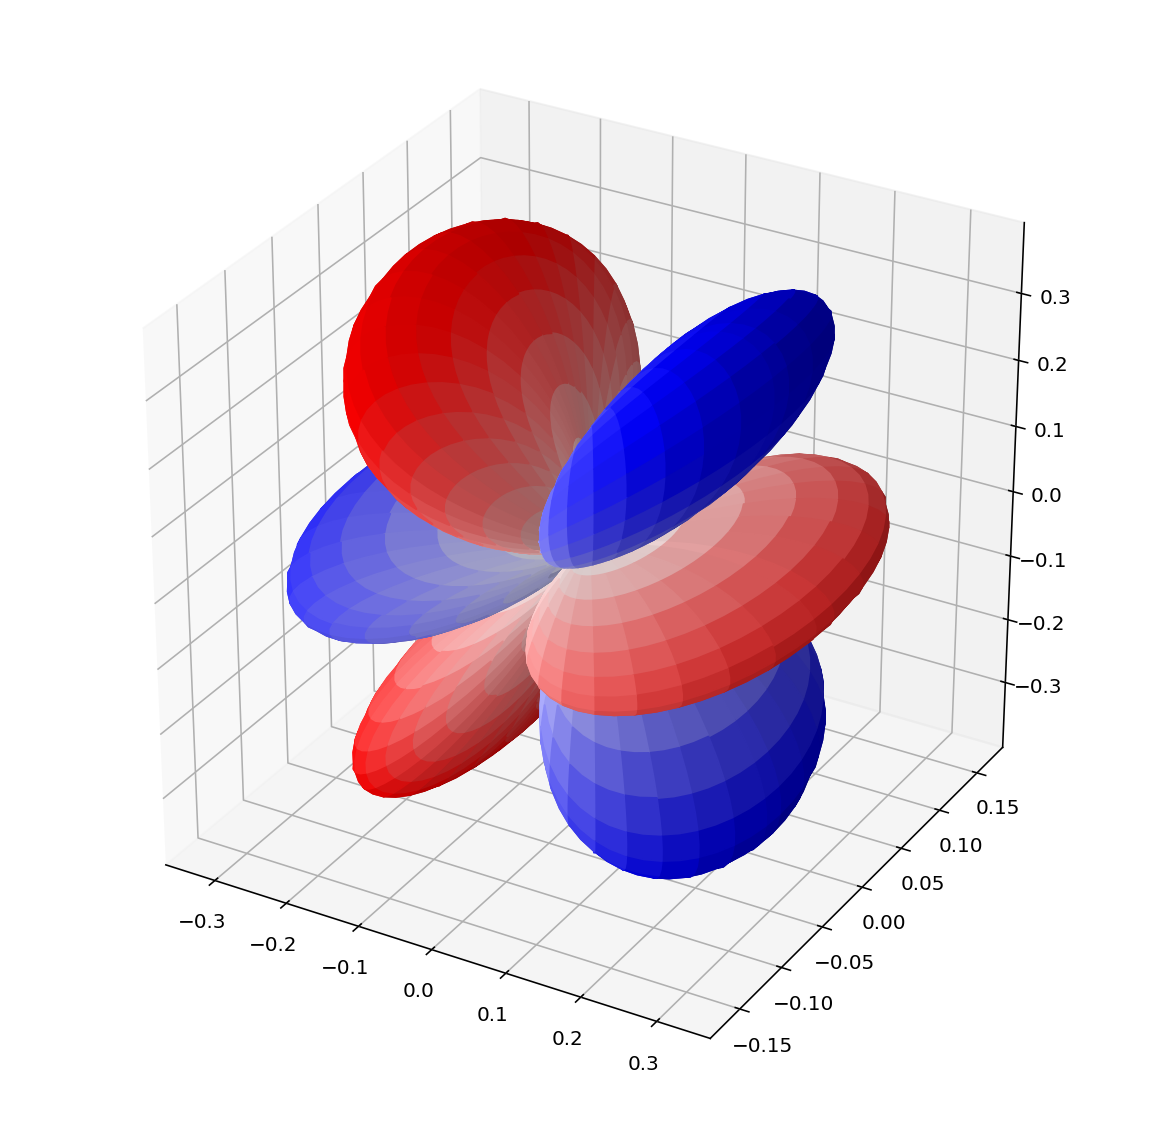

In [165]:
# Convert to Cartesian coordinates of the unit sphere, r=1
x = np.sin(phi) * np.cos(theta) * abs(Ylm)
y = np.sin(phi) * np.sin(theta) * abs(Ylm)
z = np.cos(phi) * abs(Ylm)


fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, z, facecolors=colormap.to_rgba(Ylm))

## Plot full atomic orbitlals

In [3]:
def HFunc(r,theta,phi,n,l,m):
    '''
    Hydrogen wavefunction // a_0 = 1

    INPUT
        r: Radial coordinate
        theta: Polar coordinate
        phi: Azimuthal coordinate
        n: Principle quantum number
        l: Angular momentum quantum number
        m: Magnetic quantum number

    OUTPUT
        Value of wavefunction
    '''

    coeff = np.sqrt((2.0/n)**3 * spe.factorial(n-l-1) /(2.0*n*spe.factorial(n+l)))
    
    laguerre = spe.assoc_laguerre(2.0*r/n,n-l-1,2*l+1)
    
    sphHarm = spe.sph_harm(m,l,phi,theta) 

    return coeff * np.exp(-r/n) * (2.0*r/n)**l * laguerre * sphHarm